### Chapter 4: Neural Networks

In [1]:
# import modules
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#### Activation Functions

Sigmoid: $\sigma = \frac{1}{1 + e^{-x}}$


Hyperbolic tangent: $tanh = \frac{(e^{2x} - 1)}{(e^{2x} - 1)}$


Rectified Linear Unit (ReLU): $f(x) = max(0, x)$

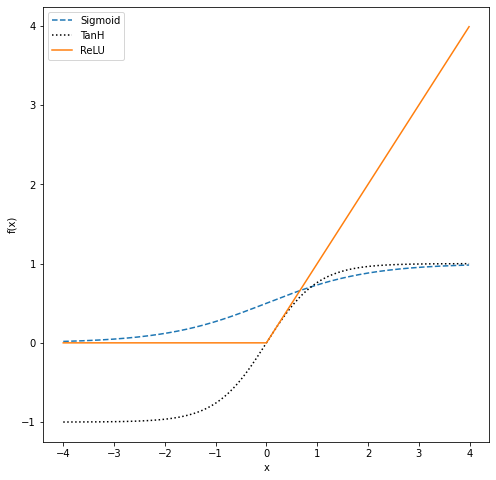

In [2]:
# page 76
# plot the activation functions to visualize the differences
x = np.arange(-4, 4, 0.01)

plt.figure(figsize=(8, 8))
plt.plot(x, 1 / (1 + np.exp(-x)), "--", label="Sigmoid")
plt.plot(x, np.tanh(x), "k:", label="TanH")
plt.plot(x, np.maximum(0, x), label="ReLU")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend();

#### Project 4-1: Building and Training a Perceptron from Scratch

In [3]:
# page 77
# create a Perceptron class
class Perceptron():

    # initialize the weights and bias to zero
    def __init__(self, features):
        self.weights = np.zeros((features, 1))
        self.bias = 0

    # define an activation function, the binary AND gate, that returns 1 if x >= 0, else 0
    def activation(self, x):
        return np.where(x >= 0, 1, 0)

    # define a predict function
    def predict(self, x):
        return self.activation(np.dot(x, self.weights) + self.bias)

    # define a training function
    def train(self, inputs, labels, eta=0.1, epochs=10):
        errors = []
        for t in range(epochs):
            # calculate prediction
            prediction = self.activation(np.dot(inputs, self.weights) + self.bias)
            # adjust weights and bias
            self.weights += eta * np.dot(inputs.T, (labels - prediction))
            self.bias += eta * np.sum(labels - prediction)
            # calculate mean squared error
            mse = np.square(np.subtract(labels, prediction)).mean()
            errors.append(mse)
            print(f"epoch: {t + 1}/{epochs}  mse: {mse}")
        # plot the mse per epoch
        plt.plot(np.arange(1, 11), errors)
        plt.xlim(1, 10)
        plt.xlabel('Epoch')
        plt.ylabel('MSE')
        plt.title("Training Error");

In [4]:
# create a training data set
X_train = np.array([[1, 1],
                    [1, 0],
                    [0, 1],
                    [0, 0]])
y_train = np.array([[1],
                    [0],
                    [0],
                    [0]])

In [5]:
# instantiate a Perceptron
ptron = Perceptron(2)

epoch: 1/10  mse: 0.75
epoch: 2/10  mse: 0.25
epoch: 3/10  mse: 0.25
epoch: 4/10  mse: 0.0
epoch: 5/10  mse: 0.0
epoch: 6/10  mse: 0.0
epoch: 7/10  mse: 0.0
epoch: 8/10  mse: 0.0
epoch: 9/10  mse: 0.0
epoch: 10/10  mse: 0.0


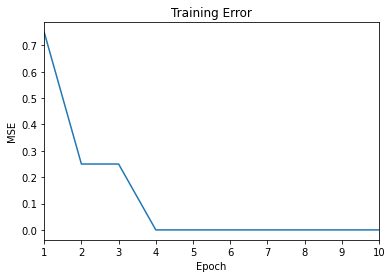

In [6]:
# train the Perceptron
ptron.train(X_train, y_train)

In [7]:
# use the model to make a prediction
ptron.predict([1, 1])

array([1])

Create a larger dataset

In [8]:
# create a larger dataset with 2 dominant clusters
x, y = make_blobs(n_samples=200, centers=2, random_state=1)
x.shape, y.shape

((200, 2), (200,))

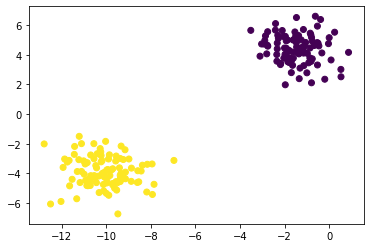

In [9]:
# create a scatter plot of the data
plt.scatter(x[:, 0], x[:, 1], c=y);

In [10]:
# separate the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 2), (50, 2), (150,), (50,))

Instantiate a new Perceptron and train it on the larger dataset

epoch: 1/10  mse: 0.5
epoch: 2/10  mse: 0.18666666666666668
epoch: 3/10  mse: 0.0
epoch: 4/10  mse: 0.0
epoch: 5/10  mse: 0.0
epoch: 6/10  mse: 0.0
epoch: 7/10  mse: 0.0
epoch: 8/10  mse: 0.0
epoch: 9/10  mse: 0.0
epoch: 10/10  mse: 0.0


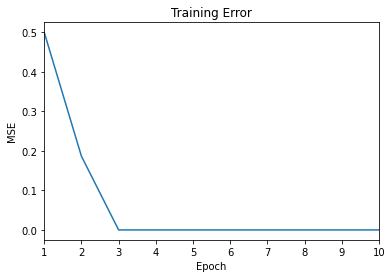

In [11]:
# instantiate a new Perceptron
perceptron = Perceptron(2)

# train the Perceptron
perceptron.train(X_train, y_train[:, np.newaxis])

In [12]:
# get the weights and bias
perceptron.weights, perceptron.bias

(array([[-19.44047478],
        [-40.50764943]]),
 -4.699999999999999)

Plot the decision line

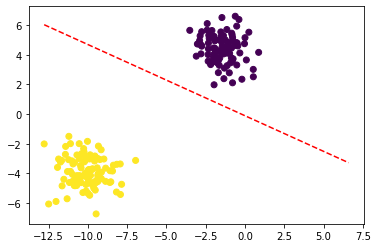

In [13]:
x_ = np.linspace(x.min(), x.max(), 100)
y_ = -(perceptron.weights[0] * x_ + perceptron.bias) / perceptron.weights[1]
plt.plot(x_, y_, "r--")
plt.scatter(x[:, 0], x[:, 1], c=y);

#### Project 4-2: Neural Net with Backpropagation

In [14]:
# page 89
# create a Neural Net with Backpropagation class
class NNBackprop():
    
    # initialize the weights and biases to random numbers between [0, 1)
    def __init__(self, layers=[2, 2, 1]):
        np.random.seed(1)   # for consistency
        self.w = [np.random.uniform(size=(layers[i], layers[i + 1])) for i in range(len(layers) - 1)]
        self.b = [np.random.uniform(size=(1, layers[i + 1])) for i in range(len(layers) -1)]
        
    # define a sigmoid activation function
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    # define the gradient of the sigmoid function
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    # define the forward propagation function
    def forward(self, x):
        z0 = self.sigmoid(np.dot(x, self.w[0]) + self.b[0])
        z1 = self.sigmoid(np.dot(z0, self.w[1]) + self.b[1])
        return (z0, z1)
    
    # define the backward propagation function
    def backward(self, z, labels, lr):
        error = labels - z[1]
        d1 = error * self.sigmoid_derivative(z[1])
        d0 = d1.dot(self.w[1].T) * self.sigmoid_derivative(z[0])
        # update weights and biases
        self.w[1] += z[0].T.dot(d1) * lr
        self.b[1] += np.sum(d1, axis=0, keepdims=True) * lr
        self.w[0] += inputs.T.dot(d0) * lr
        self.b[0] += np.sum(d0, axis=0, keepdims=True) * lr
        
    # define a training function
    def train(self, inputs, labels, epochs=10000, lr=0.1):
        errors = []
        for t in range(epochs):
            # forward propagation step
            z = self.forward(inputs)
            # backward propagation step
            self.backward(z, labels, lr)
            # calculate loss (MSE)
            loss = ((labels - z[1])**2).mean()
            errors.append(loss)
        # plot the MSE per epoch
        plt.plot(errors)
        plt.xlabel('Epoch')
        plt.ylabel('MSE')
        plt.title("Training Error");

In [15]:
# create a training dataset
inputs = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])
labels = np.array([[0],
                   [1],
                   [1],
                   [0]])

In [16]:
# instantiate the Neural Net
nn = NNBackprop(layers=[2, 2, 1])

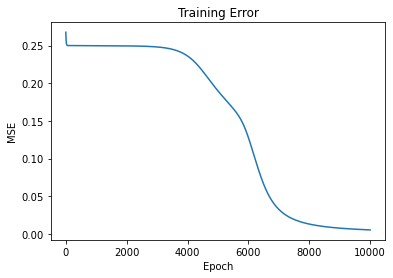

In [17]:
# train the Neural Net
nn.train(inputs, labels)

In [18]:
# use the model to make a prediction
pred = nn.forward(inputs)[1]
print("Expected: {}".format(labels.tolist()))
print("Predicted: {}".format([[int(p > 0.5)] for p in pred]))

Expected: [[0], [1], [1], [0]]
Predicted: [[0], [1], [1], [0]]
